In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('articles.xlsx')

In [3]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

In [4]:
papers_per_day = df.groupby(['Date']).size().reset_index(name='NumPapers')

In [5]:
papers_per_category = df.groupby(['Main Category']).size().reset_index(name='NumPapers')

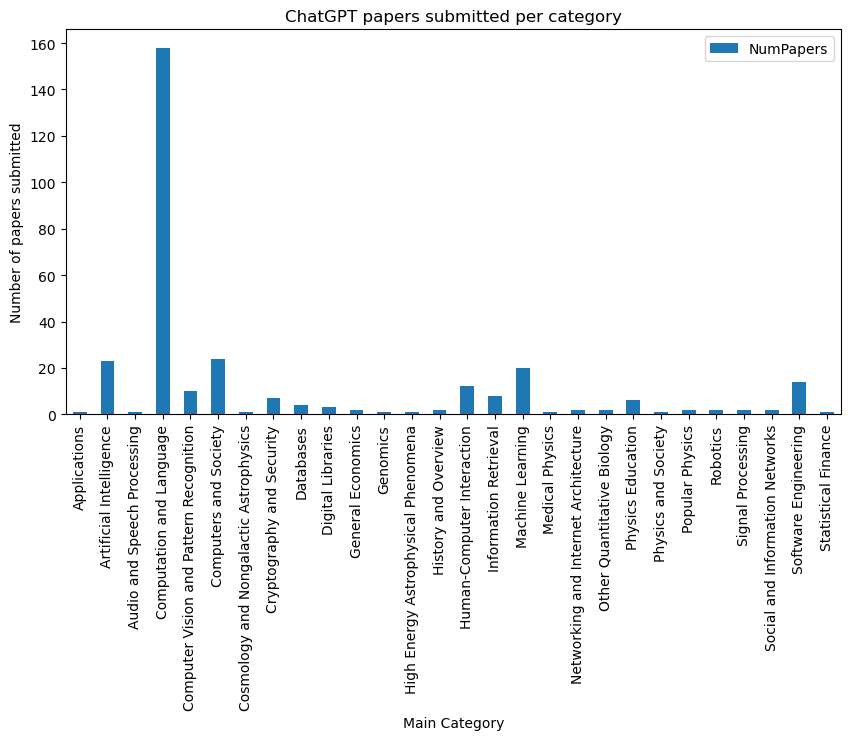

In [6]:
fig, ax = plt.subplots(figsize=(10,5))
papers_per_category.plot.bar(x='Main Category', y='NumPapers', ax=ax)
plt.xlabel('Main Category')
plt.ylabel('Number of papers submitted')
plt.title('ChatGPT papers submitted per category')
# plt.xticks(rotation=60)
plt.show()

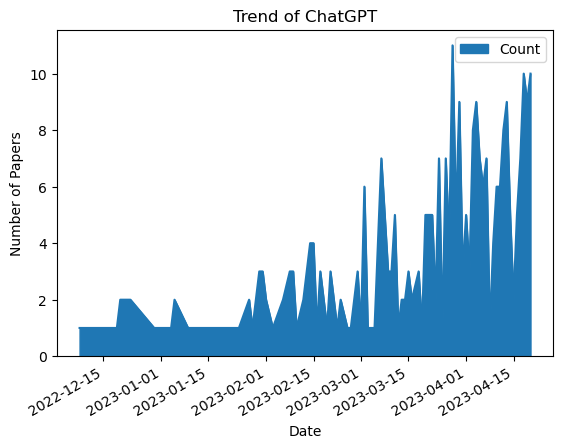

In [7]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

# Group the DataFrame by date and category
grouped = df.groupby(['Date']).size().reset_index(name='Count')

# Pivot the DataFrame to have dates as rows and categories as columns
pivot_table = pd.pivot_table(grouped, values='Count', index='Date', columns=None, fill_value=0)

# Create a stacked area plot
pivot_table.plot(kind='area', stacked=True)

# Add axis labels and a title
# plt.xlabel('Date')
plt.ylabel('Number of Papers')
plt.title('Trend of ChatGPT')

# Show the plot
plt.show()

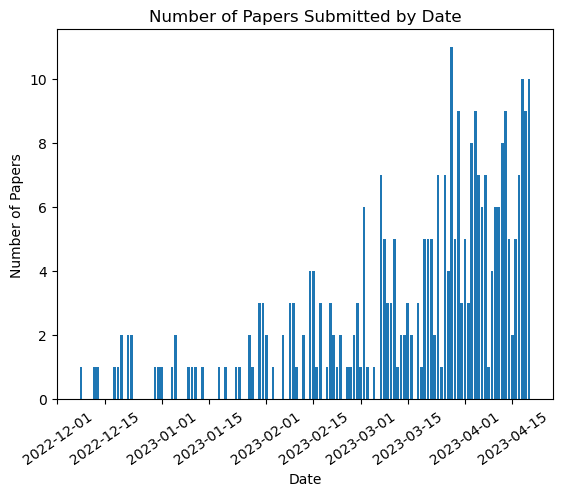

In [8]:
date_counts = {}
for date in pd.date_range(start=df['Date'].min(), end=df['Date'].max()):
    date_counts[date.date()] = 0

# Count the number of papers submitted on each date
for _, row in df.iterrows():
    date = row['Date'].date()
    date_counts[date] += 1

# Convert the dictionary to a pandas Series
date_counts = pd.Series(date_counts)

# Plot the number of papers submitted by date
plt.bar(date_counts.index, date_counts.values)
plt.title('Number of Papers Submitted by Date')
plt.xlabel('Date')
plt.xticks(rotation=35)
plt.ylabel('Number of Papers')
plt.show()